In [1]:
import torch
import numpy as np
#当时为了配置好gpu,先是下载cuda对应版本的pytorch,然后下载了cudnn.配置系统变量。

# Tensor Initialization


In [2]:
#Directly from data
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
print(data)
print(x_data)

[[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


In [3]:
#From a Numpy array
np_array=np.array(data)
x_np=torch.from_numpy(np_array)
print(np_array)
print(x_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [4]:
#From another tensor
x_ones=torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")
x_rand=torch.rand_like(x_data,dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1548, 0.9074],
        [0.2811, 0.5504]]) 



In [6]:
#With random and constant values
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9429, 0.5457, 0.1810],
        [0.8819, 0.2353, 0.1806]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
#Tensor Attributes
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
#Tensor Operations操作
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

Device tensor is stored on: cuda:0


In [ ]:
# This computes the element-wise product元素积
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")
#This computes the matrix multiplication between two tensors

print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")


In [9]:
#In-place operations Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.改变自己

print(tensor, "\n")
tensor.add_(5)
print(tensor)


tensor([[0.1321, 0.4433, 0.6876, 0.1640],
        [0.5174, 0.0414, 0.3493, 0.1932],
        [0.5312, 0.3532, 0.4461, 0.5794]], device='cuda:0') 

tensor([[5.1321, 5.4433, 5.6876, 5.1640],
        [5.5174, 5.0414, 5.3493, 5.1932],
        [5.5312, 5.3532, 5.4461, 5.5794]], device='cuda:0')


# Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying底层 memory locations, and changing one will change the other.

In [10]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# A Gentle Introduction to torch.autograd


Neural networks (NNs) are a collection of nested嵌套 functions that are executed执行 on some input data.

Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess. Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives导数 of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent梯度下降. For a more detailed walkthrough演示 of backprop, check out this video from 3Blue1Brown.

前向传播:在前向传播中，神经网络对正确的输出做出最好的猜测。它通过每个函数运行输入数据来进行猜测。
反向传播:在反向传播中，神经网络根据其猜测中的误差调整其参数。它通过从输出向后遍历，收集误差相对于函数参数(梯度)的导数，并使用梯度下降优化参数来实现这一点。要了解更详细的反向道具演练，请查看3Blue1Brown的视频。

In [8]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [9]:
#向前传播
prediction = model(data) # forward pass
#向后传播
print(prediction.size())
print(labels.size())
loss = (prediction - labels).sum()
loss.backward() # backward pass
# we load an optimizer, in this case SGD with a learning rate学习率 of 0.01 and momentum动量 of 0.9. We register all the parameters of the model in the optimizer.
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step() #gradient descent

torch.Size([1, 1000])
torch.Size([1, 1000])


关于prediction的尺寸为(1, 1000)的原因如下：
输入数据形状: data是一个形状为(1, 3, 64, 64)的张量，表示一个批次包含1个样本，每个样本有3个通道（如RGB图像），高度和宽度分别为64像素。

ResNet-18模型结构: ResNet-18是一个用于图像分类任务的卷积神经网络。它将输入图像通过一系列卷积层、池化层和全连接层处理后，输出一个长度为1000的向量。这个向量对应ImageNet数据集中1000个不同的类别。

输出维度解释: 输出prediction的形状为(1, 1000)意味着对于输入的一个图像样本，模型产生了1000个预测值，每个值代表图像属于ImageNet数据集中某个类别的概率或得分respectve各自的
accumulate累积，backward 反向，dynamic动态的，exclude排除，gradient梯度，loss损失，optimizer优化器，parameter参数，prediction预测，step步，tensor张量，weight权重。

梯度下降法
梯度下降是一种用于求解最小化问题的迭代优化算法，通常用于机器学习中的参数优化。它的基本思想是通过沿着目标函数（通常是损失函数或成本函数）梯度的负方向来更新参数，从而逐渐减小目标函数的值，直到找到一个局部最小值或全局最小值。
梯度下降有几种变体：
批量梯度下降 (Batch Gradient Descent): 使用所有训练样本计算梯度并更新参数。
随机梯度下降 (Stochastic Gradient Descent, SGD): 每次只用一个训练样本来估计梯度，并更新参数。
小批量梯度下降 (Mini-batch Gradient Descent): 折中方案，每次使用一小批训练样本来估计梯度。

学习率
学习率（Learning Rate）是梯度下降算法中的一个重要超参数，它决定了参数更新的步长。具体来说，学习率决定了我们沿着梯度方向移动多远。选择合适的学习率非常重要：
如果学习率太小，算法收敛速度会很慢。
如果学习率太大，则可能导致在最小值附近震荡甚至发散。
为了提高效率和稳定性，有时会使用自适应学习率的方法，如Adagrad、RMSprop、Adam等算法，它们能够自动调整不同参数的学习率。

动量
动量（Momentum）是梯度下降的一个改进版本，其目的是加速收敛速度并帮助算法更快地穿过平坦区域。动量的思想是在更新参数时不仅考虑当前梯度的方向，还考虑之前的更新方向，即给当前的更新加上一个“动量”项，使得参数更新具有惯性。这样可以帮助梯度下降更快地逃出一些局部极小值或者鞍点。
动量项通常是一个介于0到1之间的系数，乘以前一次的更新量，然后加到当前的梯度上。动量项的引入有助于平滑参数更新的过程，减少振荡，特别是在损失函数曲面有很多维度的情况下。
在实践中，选择合适的学习率和动量系数是通过实验和调参来完成的。不同的问题可能需要不同的设置来获得最佳性能。

# Neural Networks

A typical training procedure过程 for a neural network is as follows:

    Define the neural network that has some learnable parameters (or weights)

    Iterate迭代 over a dataset of inputs

    Process input through the network

    Compute the loss (how far is the output from being correct)

    Propagate传播 gradients back into the network’s parameters

    Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient


In [2]:
#define the neural network
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [4]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0534, -0.0346, -0.1005, -0.2244, -0.0727, -0.0020,  0.0082,  0.0221,
         -0.1065, -0.0343]], grad_fn=<AddmmBackward0>)


In [5]:
#Zero归零 the gradient buffers缓冲区 of all parameters and backprops可能是“替换为” with random gradients:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [ ]:
#Before proceeding further在继续之前, let’s recap 回顾all the classes you’ve seen so far.
 #Convenient方便的 way of encapsulating封装 parameters
 #assign分配

In [6]:
#Loss Function
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(2.2428, grad_fn=<MseLossBackward0>)


在神经网络中，ReLU（Rectified Linear Unit）、池化层（Pooling Layer）和全连接层（Fully Connected Layer）都是构建深度学习模型的重要组成部分。下面是对它们各自功能的简要说明：

1. **ReLU (修正线性单元)**
   - ReLU 是一种激活函数，它的数学表达式为 \( f(x) = \max(0, x) \)。这意味着对于所有负值输入，输出为零；对于所有正值输入，输出等于输入。
   - 它的主要优点是计算效率高，因为它只需要阈值操作就能实现非线性映射。ReLU 还有助于缓解梯度消失问题，这是在训练深层网络时可能出现的一个挑战。
   - 在实践中，ReLU 被广泛应用于各种类型的神经网络中，尤其是在卷积神经网络（CNNs）中。

2. **池化层 (Pooling Layer)**
   - 池化层主要用于减少其输入的空间维度，即减小特征图的宽度和高度，从而降低接下来的网络层的计算复杂度。
   - 最常见的池化类型是最大池化（Max Pooling），它通过选择一个区域内的最大值作为该区域的输出。还有平均池化（Average Pooling），它采用区域内的平均值。
   - 池化操作不仅减少了参数数量和计算量，还提供了一定程度的平移不变性，这对于图像分类等任务是有益的。

3. **全连接层 (Fully Connected Layer)**
   - 全连接层是指每一神经元都与前一层的所有神经元相连。这种层通常位于神经网络的末尾，用于将前面层提取到的特征映射到最终的决策空间。
   - 在图像分类任务中，全连接层通常接收来自卷积层或池化层的平坦化（Flattened）输出，并将其映射到分类标签上。
   - 全连接层可以被视为一个标准的多层感知器（MLP），其中每个神经元都有权重和偏置，并且通常使用某种形式的激活函数（如ReLU）。

ReLU（Rectified Linear Unit）作为一种激活函数，在深度学习中被广泛采用，主要是因为它带来了一系列的优点：

1. **解决梯度消失问题**：
   - 在深层网络中，传统的激活函数如sigmoid和tanh可能导致梯度消失问题，这是因为它们的导数在输入较大或较小时接近于0。而ReLU的导数对于所有正输入都是1，这有助于保持梯度大小，从而加速深层网络的训练过程。

2. **计算效率**：
   - ReLU 函数的计算非常简单，只需判断输入是否大于0即可，这比计算指数函数（如sigmoid）或除法运算（如tanh）要快得多。因此，使用 ReLU 可以显著加快训练速度。

3. **稀疏激活**：
   - ReLU 可以产生稀疏激活，即很多神经元的输出为0。这种稀疏性有助于模型学习更有效的表示，同时也减少了计算资源的需求。

4. **生物启发**：
   - 有理论认为，ReLU 的行为与大脑神经元的工作方式相似，即神经元在没有足够的刺激时不会激发（输出为0），而在足够强的刺激下则会激发（输出为正值）。

尽管 ReLU 有很多优点，但它也有一些缺点，比如“死亡”ReLU 问题，即某些神经元可能会永久地关闭（因为它们的梯度为0，导致它们永远不会被更新）。为了解决这个问题，研究者们提出了许多变种，例如 Leaky ReLU、Parametric ReLU (PReLU) 和 Exponential Linear Units (ELUs) 等，它们试图保留 ReLU 的优点同时克服其局限性。
激活函数在神经网络中扮演着至关重要的角色。它们被设计用来引入非线性因素，从而使神经网络能够学习和处理更为复杂的模式。以下是激活函数的一些关键作用：

1. **引入非线性**：
   - 单纯的线性变换不足以让神经网络模拟复杂的现实世界数据分布。激活函数通过在其输出中引入非线性，使网络能够拟合非线性关系的数据。如果没有激活函数，无论网络有多少层，输出都将是一个输入的线性组合，这就退化成了一个单层的线性模型。

2. **决策边界**：
   - 激活函数帮助定义神经元如何响应给定的输入。例如，在二分类问题中，sigmoid 函数可以将连续的输出转换为概率值，从而便于做出分类决策。

3. **梯度传递**：
   - 在反向传播过程中，激活函数的导数决定了权重调整的方向和大小。良好的激活函数应该能够有效地传递梯度，避免梯度消失或梯度爆炸的问题。

4. **规范化输出**：
   - 某些激活函数（如sigmoid或tanh）可以将任意范围内的输入值压缩到一个特定区间内（例如，\(0\) 到 \(1\) 或 \(-1\) 到 \(1\)），这有助于规范化输出，使其更适合后续处理或作为最终输出。

5. **生物学上的合理性**：
   - 激活函数有时也考虑了生物学上的合理性，即试图模仿生物神经元的行为。例如，ReLU 的“全或无”特性类似于真实神经元的行为。

常见的激活函数包括但不限于 Sigmoid、tanh（双曲正切函数）、ReLU（修正线性单元）及其变体（如 Leaky ReLU、PReLU、ELU 等）。每种激活函数都有其适用场景和特点，选择合适的激活函数可以根据具体问题来优化模型的表现。

In [10]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [11]:
#To backpropagate反向传播 the error all we have to do is to loss.backward(). You need to clear the existing gradients though, else gradients will be accumulated累计 to existing gradients.
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0208,  0.0318,  0.0525,  0.0112, -0.0020,  0.0179])


In [12]:
#Update the weights
#The simplest update rule used in practice is the Stochastic随机 Gradient Descent下降 (SGD):
#weight = weight - learning_rate * gradient
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [13]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## 就是说在每次计算之前都需要将梯度缓冲池归零。

# Training a Classifier


    Load and normalize the CIFAR10 training and test datasets using torchvision

    Define a Convolutional Neural Network

    Define a loss function

    Train the network on the training data

    Test the network on the test data


In [14]:
#Load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [06:16<00:00, 453078.53it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


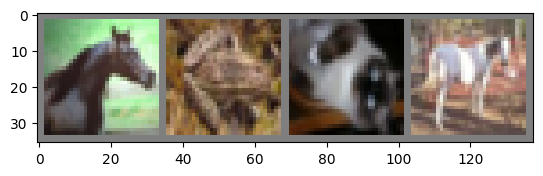

horse frog  cat   horse


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [16]:
# Define a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
# Define a Loss function and optimizer  
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.160
[1,  4000] loss: 1.815
[1,  6000] loss: 1.662
[1,  8000] loss: 1.603
[1, 10000] loss: 1.543
[1, 12000] loss: 1.456
[2,  2000] loss: 1.393
[2,  4000] loss: 1.347
[2,  6000] loss: 1.320
[2,  8000] loss: 1.334
[2, 10000] loss: 1.334
[2, 12000] loss: 1.288
Finished Training


In [19]:
#Let’s quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

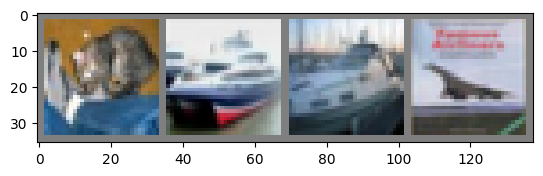

GroundTruth:  cat   ship  ship  plane


In [20]:
#Test the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [22]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   truck ship 


In [23]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [24]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.5 %
Accuracy for class: car   is 67.8 %
Accuracy for class: bird  is 50.5 %
Accuracy for class: cat   is 22.5 %
Accuracy for class: deer  is 46.7 %
Accuracy for class: dog   is 37.7 %
Accuracy for class: frog  is 64.2 %
Accuracy for class: horse is 65.4 %
Accuracy for class: ship  is 53.9 %
Accuracy for class: truck is 72.4 %


In [25]:
#Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [26]:
#Then these methods will recursively递归 go over all modules and convert their parameters and buffers to CUDA tensors:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)